# IF R^2 IS NEGATIVE, MEANS THAT ITS A WORSE FIT THAN A HORIZONTAL LINE

## Import stock price info
- create a difference in stock price table (just for most recent before for now)

In [1]:
import pandas as pd
prices = pd.read_csv(r'stockPrice.csv')
pricedif1 = {'price change(%)': ((prices.iloc[:, 2] - prices.iloc[:, 1])/prices.iloc[:, 1])*100}
pricedif1 = pd.DataFrame.from_dict(pricedif1)
pricedif1

,price change(%)
AAPL,6.977762
MSFT,2.849317
GOOG,7.367353
AMZN,13.535914
TSLA,3.231684
BRK-A,2.149706
FB,-26.390095
UNH,-0.138362
NVDA,-7.559117
JNJ,0.442428


# Revenue
- results are very different for each run through

In [20]:
rev = pd.read_csv(r'revenue.csv')
revdiff = {'rev change %': ((rev.iloc[:, 1] - rev.iloc[:, 2])/rev.iloc[:, 2])*100}
revdata = pd.DataFrame.from_dict(revdiff).join(pricedif1)
revdata.to_excel("revdata.xlsx") 

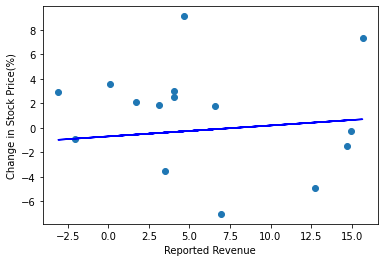

Coefficients: 
 [[0.08939421]]
Mean squared error: 19.63
Coefficient of determination: -0.14


C:\Users\jexia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


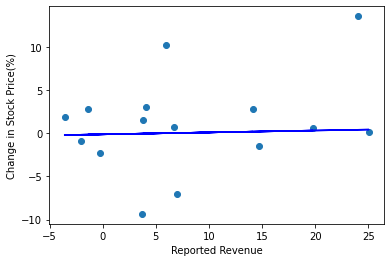

Coefficients: 
 [[0.02212717]]
Mean squared error: 30.25
Coefficient of determination: -0.02


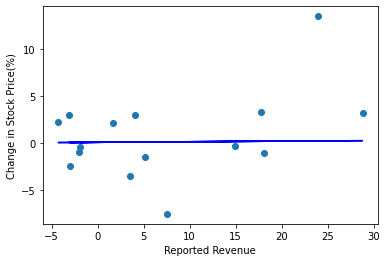

Coefficients: 
 [[0.00609514]]
Mean squared error: 20.39
Coefficient of determination: -0.01


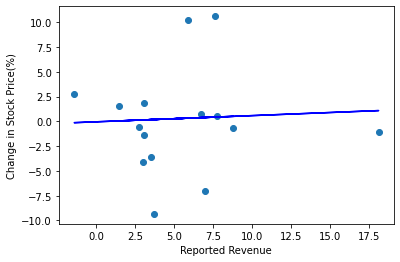

Coefficients: 
 [[0.06249236]]
Mean squared error: 26.80
Coefficient of determination: -0.00


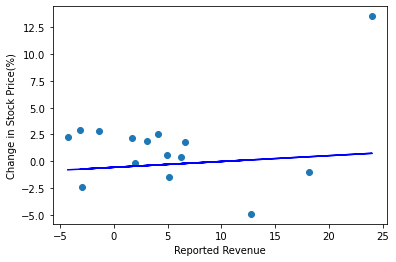

Coefficients: 
 [[0.05450366]]
Mean squared error: 17.04
Coefficient of determination: -0.12


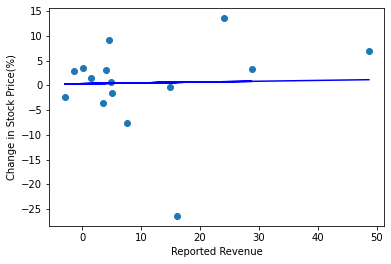

Coefficients: 
 [[0.01664888]]
Mean squared error: 74.96
Coefficient of determination: 0.01


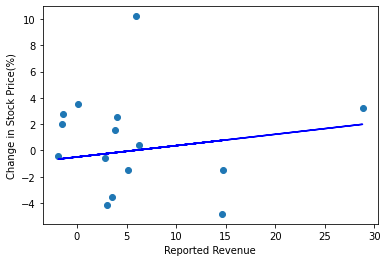

Coefficients: 
 [[0.08639358]]
Mean squared error: 14.42
Coefficient of determination: -0.08


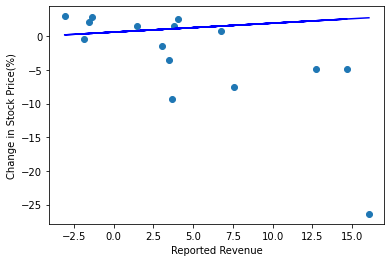

Coefficients: 
 [[0.13241551]]
Mean squared error: 79.60
Coefficient of determination: -0.49


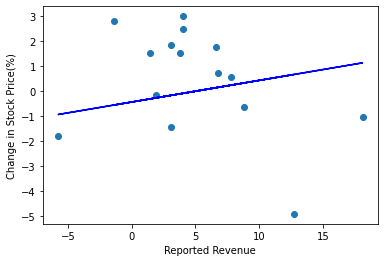

Coefficients: 
 [[0.08671622]]
Mean squared error: 5.32
Coefficient of determination: -0.26


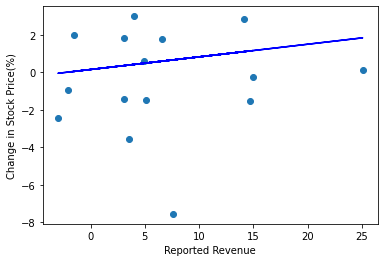

Coefficients: 
 [[0.06749116]]
Mean squared error: 8.42
Coefficient of determination: -0.17
                       coef        mse        r2
0   [[0.08939421425532434]]  19.625837 -0.141652
1  [[0.022127165108074248]]  30.245886 -0.015052
2  [[0.006095136959194258]]  20.387235 -0.014366
3   [[0.06249236414983989]]  26.795953 -0.001140
4   [[0.05450366235384053]]  17.039019 -0.124618
5  [[0.016648878519951404]]  74.962040  0.006484
6   [[0.08639357664855901]]  14.417642 -0.080809
7    [[0.1324155082657064]]  79.596443 -0.485093
8   [[0.08671621770851964]]   5.319849 -0.259239
9   [[0.06749115760004035]]   8.424782 -0.168735


In [9]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create dataframe to store coefficient, mean squared error, and r2
rev_results = pd.DataFrame.from_dict({"coef": [], "mse": [], "r2": []})

for x in range(10):
    # Create test and train sets
    rev_train, rev_test, price_train, price_test = train_test_split(revdata.iloc[:, 0], revdata.iloc[:, 1], test_size=0.3)

    # Reformat test and train sets
    rev_train = rev_train.to_frame()
    price_train = price_train.to_frame()
    rev_test = rev_test.to_frame()
    price_test = price_test.to_frame()

    # Create linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(rev_train, price_train)

    # Make predictions using the testing set
    price_pred = regr.predict(rev_test)

    # Create plot
    plt.scatter(rev_test, price_test)
    plt.plot(rev_test, price_pred, color = "blue")
    plt.xlabel("Reported Revenue")
    plt.ylabel("Change in Stock Price(%)")
    plt.show()


    # Print coefficients, mean squared error, and coefficient of determination (r^2)
    rev_results.loc[x] = [regr.coef_, mean_squared_error(price_test, price_pred), r2_score(price_test, price_pred)]
    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(price_test, price_pred))
    print("Coefficient of determination: %.2f" % r2_score(price_test, price_pred))
    
print(rev_results)

# Cost of Revenue

In [17]:
CoR = pd.read_csv(r'costOfRevenue.csv')
CoRdiff = {'CoR change %': ((CoR.iloc[:, 1] - CoR.iloc[:, 2])/CoR.iloc[:, 2])*100}
CoRdata = pd.DataFrame.from_dict(CoRdiff).join(pricedif1)
CoRdata = CoRdata.dropna()
CoRdata.head(5)

,CoR change %,price change(%)
AAPL,44.651974,6.977762
MSFT,24.285505,2.849317
GOOG,19.430868,7.367353
AMZN,31.630383,13.535914
TSLA,27.483411,3.231684


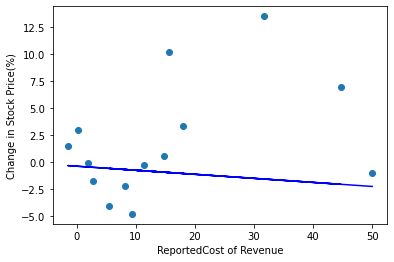

Coefficients: 
 [[-0.03767943]]
Mean squared error: 36.34
Coefficient of determination: -0.39


C:\Users\jexia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


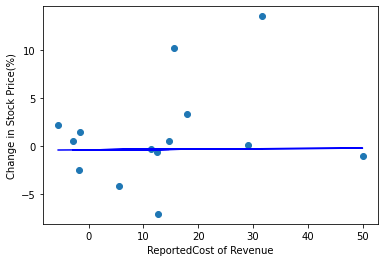

Coefficients: 
 [[0.00355502]]
Mean squared error: 27.96
Coefficient of determination: -0.08


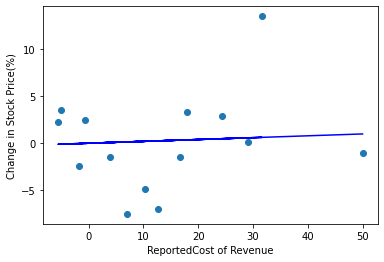

Coefficients: 
 [[0.01981652]]
Mean squared error: 25.79
Coefficient of determination: 0.02


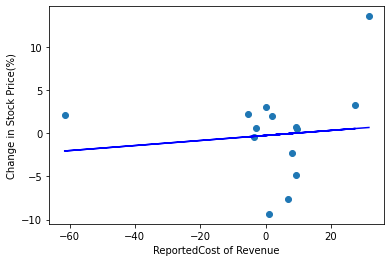

Coefficients: 
 [[0.02916597]]
Mean squared error: 27.32
Coefficient of determination: 0.02


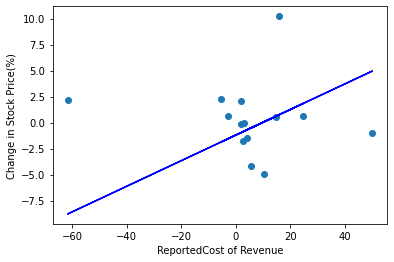

Coefficients: 
 [[0.12312636]]
Mean squared error: 22.73
Coefficient of determination: -0.93


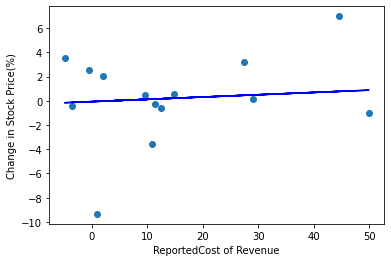

Coefficients: 
 [[0.01889036]]
Mean squared error: 12.55
Coefficient of determination: 0.04


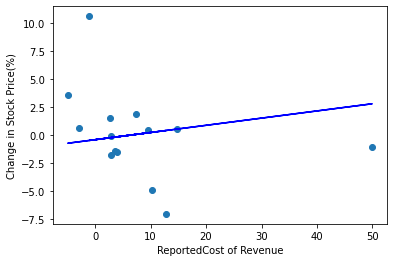

Coefficients: 
 [[0.06411413]]
Mean squared error: 17.95
Coefficient of determination: -0.18


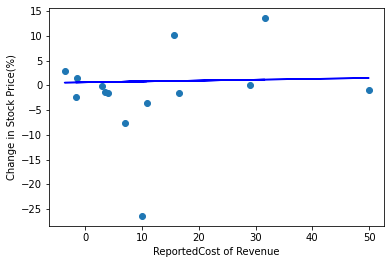

Coefficients: 
 [[0.01731645]]
Mean squared error: 78.83
Coefficient of determination: -0.04


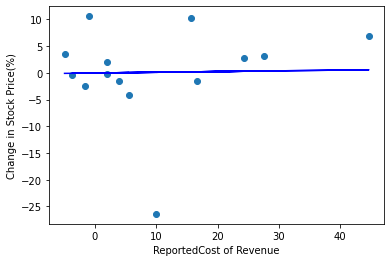

Coefficients: 
 [[0.01356294]]
Mean squared error: 72.71
Coefficient of determination: 0.01


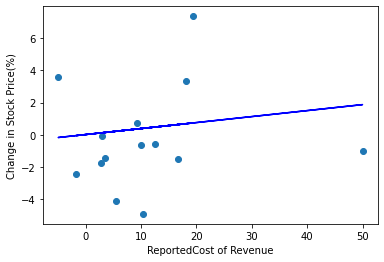

Coefficients: 
 [[0.03723496]]
Mean squared error: 9.96
Coefficient of determination: -0.04
                       coef        mse        r2
0  [[-0.03767942696908571]]  36.338032 -0.392134
1  [[0.003555018863587406]]  27.955793 -0.083664
2  [[0.019816519121308496]]  25.785900  0.020664
3  [[0.029165974633213538]]  27.319244  0.018213
4   [[0.12312636007884128]]  22.728209 -0.926035
5  [[0.018890360002009936]]  12.550959  0.039563
6    [[0.0641141250024623]]  17.951475 -0.176281
7  [[0.017316449047963693]]  78.828439 -0.044758
8  [[0.013562941525846844]]  72.708273  0.006361
9   [[0.03723495866046304]]   9.957821 -0.037978


In [18]:
# Create dataframe to store coefficient, mean squared error, and r2
CoR_results = pd.DataFrame.from_dict({"coef": [], "mse": [], "r2": []})

for x in range(10):
    # Create test and train sets
    CoR_train, CoR_test, price_train, price_test = train_test_split(CoRdata.iloc[:, 0], CoRdata.iloc[:, 1], test_size=0.3)

    # Reformat test and train sets
    CoR_train = CoR_train.to_frame()
    price_train = price_train.to_frame()
    CoR_test = CoR_test.to_frame()
    price_test = price_test.to_frame()

    # Create linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(CoR_train, price_train)

    # Make predictions using the testing set
    price_pred = regr.predict(CoR_test)

    # Create plot
    plt.scatter(CoR_test, price_test)
    plt.plot(CoR_test, price_pred, color = "blue")
    plt.xlabel("Change in Cost of Revenue (%)")
    plt.ylabel("Change in Stock Price(%)")
    plt.show()


    # Print coefficients, mean squared error, and coefficient of determination (r^2)
    CoR_results.loc[x] = [regr.coef_, mean_squared_error(price_test, price_pred), r2_score(price_test, price_pred)]
    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(price_test, price_pred))
    print("Coefficient of determination: %.2f" % r2_score(price_test, price_pred))
    
print(CoR_results)

# Gross Profit


In [25]:
GP = pd.read_csv(r'grossProfit.csv')
GPdiff = {'GP change %': ((GP.iloc[:, 1] - GP.iloc[:, 2])/GP.iloc[:, 2])*100}
GPdata = pd.DataFrame.from_dict(GPdiff).join(pricedif1)
GPdata = GPdata.dropna()
GPdata.head(5)

,CoR change %,price change(%)
AAPL,54.213339,6.977762
MSFT,9.778662,2.849317
GOOG,12.907699,7.367353
AMZN,13.982290,13.535914
TSLA,32.431694,3.231684


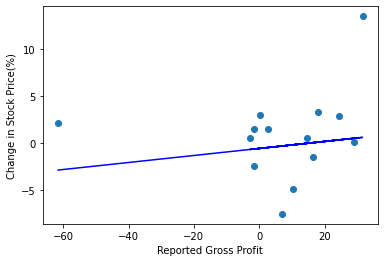

Coefficients: 
 [[0.0374317]]
Mean squared error: 22.38
Coefficient of determination: -0.05


C:\Users\jexia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


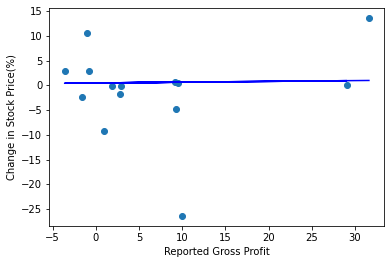

Coefficients: 
 [[0.01606332]]
Mean squared error: 81.69
Coefficient of determination: -0.03


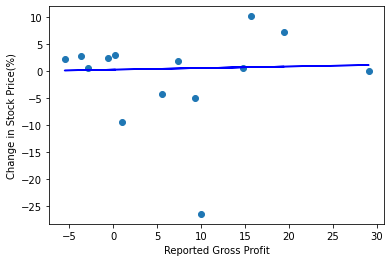

Coefficients: 
 [[0.02906465]]
Mean squared error: 73.67
Coefficient of determination: -0.03


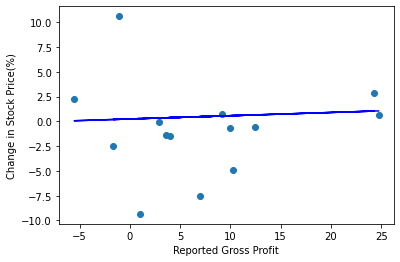

Coefficients: 
 [[0.03269398]]
Mean squared error: 22.84
Coefficient of determination: -0.08


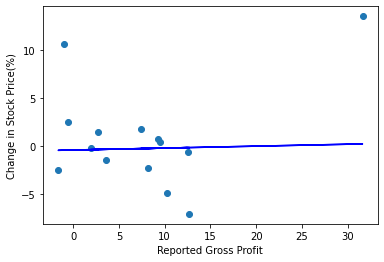

Coefficients: 
 [[0.02004748]]
Mean squared error: 28.23
Coefficient of determination: -0.03


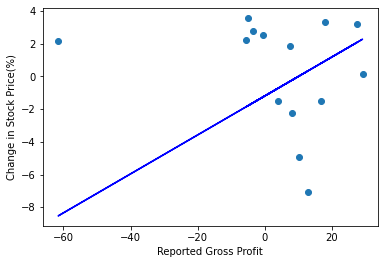

Coefficients: 
 [[0.11920836]]
Mean squared error: 21.29
Coefficient of determination: -1.08


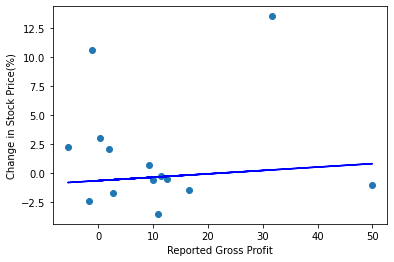

Coefficients: 
 [[0.02936539]]
Mean squared error: 25.38
Coefficient of determination: -0.14


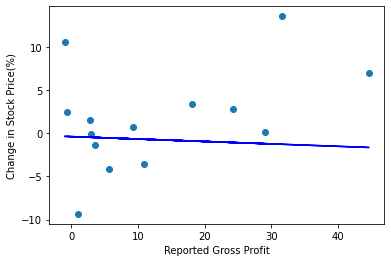

Coefficients: 
 [[-0.02811121]]
Mean squared error: 40.35
Coefficient of determination: -0.25


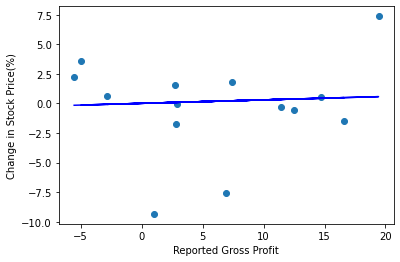

Coefficients: 
 [[0.02913988]]
Mean squared error: 16.26
Coefficient of determination: -0.00


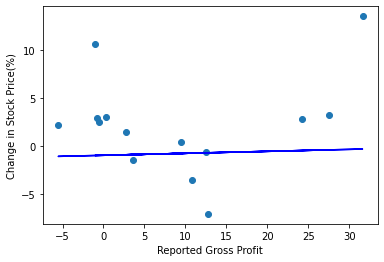

Coefficients: 
 [[0.02049334]]
Mean squared error: 32.73
Coefficient of determination: -0.33
                        coef        mse        r2
0    [[0.03743169780801177]]  22.377173 -0.046094
1    [[0.01606332359441095]]  81.685303 -0.025316
2   [[0.029064651537493012]]  73.671311 -0.029194
3   [[0.032693983902494346]]  22.838217 -0.078879
4    [[0.02004748330260468]]  28.227721 -0.027789
5    [[0.11920835832689111]]  21.290179 -1.079366
6   [[0.029365385365793712]]  25.384133 -0.143944
7  [[-0.028111211839515784]]  40.354914 -0.251013
8   [[0.029139879067919556]]  16.263631 -0.000109
9    [[0.02049334404641074]]  32.734231 -0.329712


In [24]:
# Create dataframe to store coefficient, mean squared error, and r2
GP_results = pd.DataFrame.from_dict({"coef": [], "mse": [], "r2": []})

for x in range(10):
    # Create test and train sets
    GP_train, GP_test, price_train, price_test = train_test_split(GPdata.iloc[:, 0], GPdata.iloc[:, 1], test_size=0.3)

    # Reformat test and train sets
    GP_train = GP_train.to_frame()
    price_train = price_train.to_frame()
    GP_test = GP_test.to_frame()
    price_test = price_test.to_frame()

    # Create linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(GP_train, price_train)

    # Make predictions using the testing set
    price_pred = regr.predict(GP_test)

    # Create plot
    plt.scatter(GP_test, price_test)
    plt.plot(GP_test, price_pred, color = "blue")
    plt.xlabel("Reported Gross Profit")
    plt.ylabel("Change in Stock Price(%)")
    plt.show()


    # Print coefficients, mean squared error, and coefficient of determination (r^2)
    GP_results.loc[x] = [regr.coef_, mean_squared_error(price_test, price_pred), r2_score(price_test, price_pred)]
    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(price_test, price_pred))
    print("Coefficient of determination: %.2f" % r2_score(price_test, price_pred))
    
print(GP_results)

# Earnings Suprise

In [30]:
ES = pd.read_csv(r'earningsSuprise.csv')
ESdata = pd.DataFrame(ES.iloc[:,1]).join(pricedif1)
ESdata = ESdata.dropna()
ESdata.head(5)

,Most Recent Suprise,price change(%)
AAPL,11.11,6.977762
MSFT,8.30,2.849317
GOOG,14.99,7.367353
AMZN,61.33,13.535914
TSLA,42.50,3.231684


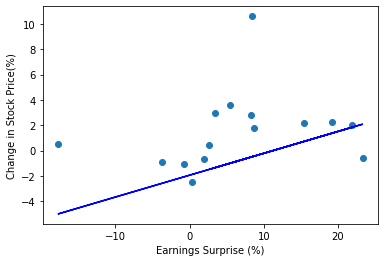

C:\Users\jexia\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Coefficients: 
 [[0.1726833]]
Mean squared error: 15.14
Coefficient of determination: -0.73


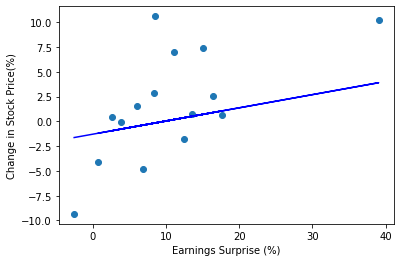

Coefficients: 
 [[0.13304279]]
Mean squared error: 23.85
Coefficient of determination: 0.17


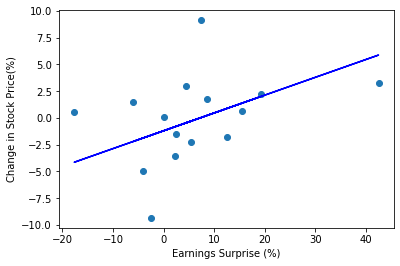

Coefficients: 
 [[0.16637487]]
Mean squared error: 15.34
Coefficient of determination: 0.07


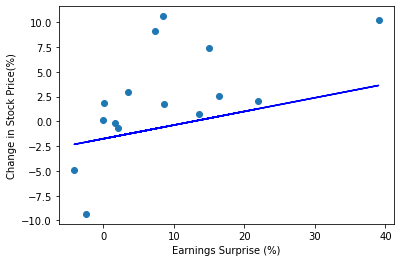

Coefficients: 
 [[0.13765942]]
Mean squared error: 28.16
Coefficient of determination: -0.02


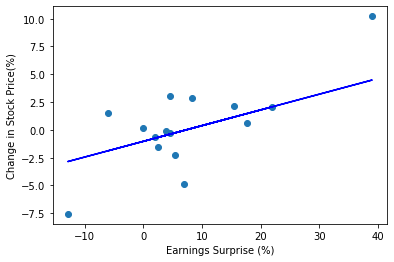

Coefficients: 
 [[0.14137983]]
Mean squared error: 7.76
Coefficient of determination: 0.47


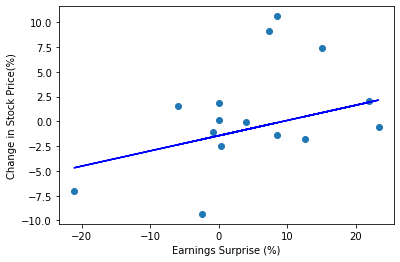

Coefficients: 
 [[0.15367957]]
Mean squared error: 23.54
Coefficient of determination: 0.13


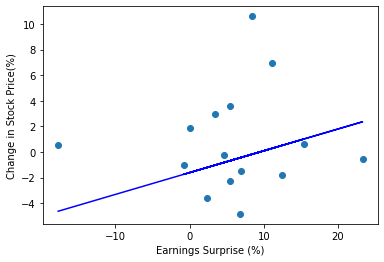

Coefficients: 
 [[0.17048272]]
Mean squared error: 18.43
Coefficient of determination: -0.22


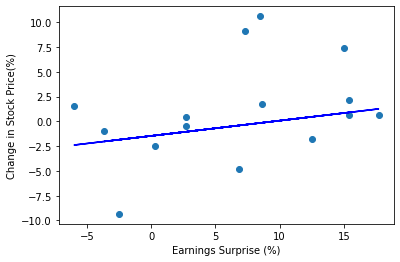

Coefficients: 
 [[0.15371907]]
Mean squared error: 23.64
Coefficient of determination: 0.04


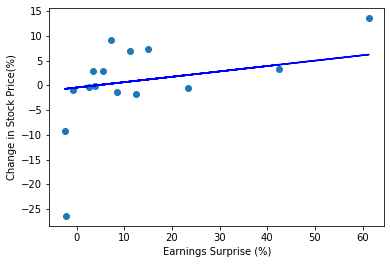

Coefficients: 
 [[0.1085751]]
Mean squared error: 65.14
Coefficient of determination: 0.18


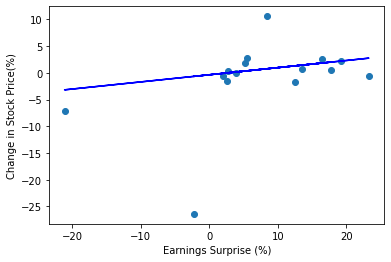

Coefficients: 
 [[0.13357385]]
Mean squared error: 53.88
Coefficient of determination: 0.07
                      coef        mse        r2
0  [[0.17268329743972774]]  15.141848 -0.734227
1  [[0.13304278978528786]]  23.846469  0.170262
2  [[0.16637486546553298]]  15.342621  0.073039
3  [[0.13765941788884145]]  28.161041 -0.019844
4   [[0.1413798343630668]]   7.757012  0.470056
5  [[0.15367957320132644]]  23.538468  0.125422
6   [[0.1704827154936769]]  18.433051 -0.224264
7  [[0.15371906930296858]]  23.637672  0.035749
8  [[0.10857509764994808]]  65.138946  0.175589
9  [[0.13357384920114818]]  53.877156  0.071678


In [32]:
# Create dataframe to store coefficient, mean squared error, and r2
ES_results = pd.DataFrame.from_dict({"coef": [], "mse": [], "r2": []})

for x in range(10):
    # Create test and train sets
    ES_train, ES_test, price_train, price_test = train_test_split(ESdata.iloc[:, 0], ESdata.iloc[:, 1], test_size=0.3)

    # Reformat test and train sets
    ES_train = ES_train.to_frame()
    price_train = price_train.to_frame()
    ES_test = ES_test.to_frame()
    price_test = price_test.to_frame()

    # Create linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(ES_train, price_train)

    # Make predictions using the testing set
    price_pred = regr.predict(ES_test)

    # Create plot
    plt.scatter(ES_test, price_test)
    plt.plot(ES_test, price_pred, color = "blue")
    plt.xlabel("Earnings Surprise (%)")
    plt.ylabel("Change in Stock Price(%)")
    plt.show()


    # Print coefficients, mean squared error, and coefficient of determination (r^2)
    ES_results.loc[x] = [regr.coef_, mean_squared_error(price_test, price_pred), r2_score(price_test, price_pred)]
    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(price_test, price_pred))
    print("Coefficient of determination: %.2f" % r2_score(price_test, price_pred))
    
print(ES_results)

# KNN    **SCRAPPED


In [46]:
pd.DataFrame(ES.iloc[:,1])
pd.DataFrame.from_dict(GPdiff)
pd.DataFrame.from_dict(CoRdiff)
pd.DataFrame.from_dict(revdiff)

df = pd.DataFrame(ES.iloc[:,1]).merge(pd.DataFrame.from_dict(GPdiff)).merge(pd.DataFrame.from_dict(CoRdiff)).merge(pd.DataFrame.from_dict(revdiff))

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False